In [3]:
from os import listdir, makedirs
from os.path import basename, dirname, exists, isfile, join, realpath, splitext
import numpy as np
import matplotlib.pyplot as plt
import sys
plt.rcParams.update({'font.size': 12})

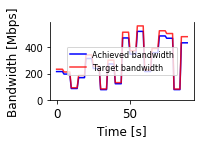

In [4]:


filedir = realpath("./")
inputdir = realpath(join(filedir, '../data/fig10/'))

def load_data(file_name):
	crnt_file = open(file_name)
	lines = crnt_file.readlines()
	crnt_file.close()
	bw_data = [float(x.strip()) for x in lines]
	return bw_data

def plot(fig, ax, aws_data, das_data, stride, legend):
	arr_len = len(aws_data)
	i = 0
	x_coord = 0
	while i < arr_len:
		if (legend == True):
			ax.plot(np.arange(x_coord, x_coord + stride), aws_data[i : i + stride], color="blue", label="AWS")
			ax.plot(np.arange(x_coord, x_coord + stride), das_data[i : i + stride], color="red", label="Emulation")
			legend = False
		else:
			ax.plot(np.arange(x_coord, x_coord + stride), aws_data[i : i + stride], color="blue")
			ax.plot(np.arange(x_coord, x_coord + stride), das_data[i : i + stride], color="red")

		i += stride
		x_coord += 30

def sort_lim(elem):
	return int(elem.split('m')[0])

def plot_emul(filename, data, lim):
	fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (3, 2))
	ax.plot(range(len(data)), data, color='blue', label='Achieved bandwidth', linewidth=1.5)
	ax.plot(range(len(lim)), lim, color='red', label='Target bandwidth', alpha=0.8, linewidth=1.5)
	ax.set_xlabel("Time [s]")
	ax.set_ylabel("Bandwidth [Mbps]")

	for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(10)

	ax.set_ylim(0, 1.05*max(max(data), max(lim)))
	ax.ticklabel_format(useOffset=False, style='plain')
	ax.spines['top'].set_visible(False)
	ax.xaxis.set_ticks_position('bottom')
	ax.legend(loc=10, prop={'size': 8})
	plt.tight_layout()
	plt.show()

def plot_emulations(fdr, rate):
	rawdata = open(join(fdr, rate + '.csv'), 'r')
	data = [float(x.split(",")[0]) * 1000 / 5 for x in rawdata]
	data = np.repeat(data, 5).tolist()
	rawdata.seek(0)
	lims = [float(x.split(",")[2]) for x in rawdata]
	lims = np.repeat(lims, 5).tolist()
	plot_emul(rate, data, lims)
	rawdata.close()

rates = [splitext(f)[0] for f in listdir(inputdir) if isfile(join(inputdir, f)) and f.endswith('.csv')]

for rate in rates:
	plot_emulations(inputdir, rate)
